In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
data = pd.read_csv("PlayTennis.csv")

In [241]:
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [242]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [243]:
data.tail()

,Outlook,Temperature,Humidity,Wind,Play Tennis
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [244]:
data.isna().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [246]:
data.describe()

,Outlook,Temperature,Humidity,Wind,Play Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [247]:
data.shape

(14, 5)

In [248]:
from sklearn.preprocessing import LabelEncoder

In [249]:
Outlook= LabelEncoder()
Temperature = LabelEncoder()
Humidity = LabelEncoder()
Wind = LabelEncoder()
Play = LabelEncoder()

In [250]:
data["Outlook"] = Outlook.fit_transform(data["Outlook"])
data["Humidity"] = Humidity.fit_transform(data["Humidity"])
data["Temperature"] = Temperature.fit_transform(data["Temperature"])
data["Wind"] = Wind.fit_transform(data["Wind"])
data["Play Tennis"] = Play.fit_transform(data["Play Tennis"])

In [251]:
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [252]:
x = data[["Outlook","Humidity","Temperature","Wind"]]
y = data["Play Tennis"]

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.2, random_state=True)

In [255]:
xtrain

,Outlook,Humidity,Temperature,Wind
11,0,0,2,0
5,1,1,0,0


In [256]:
xtest

,Outlook,Humidity,Temperature,Wind
3,1,0,2,1
7,2,0,2,1
6,0,1,0,0
2,0,0,1,1
10,2,1,2,0
4,1,1,0,1
1,2,0,1,0
12,0,1,1,1
0,2,0,1,1
13,1,0,2,0


In [257]:
from sklearn.tree import DecisionTreeClassifier

In [258]:
dectree = DecisionTreeClassifier(criterion="entropy")

In [259]:
dectree.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [260]:
dectree.predict(xtest)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [261]:
xtest

,Outlook,Humidity,Temperature,Wind
3,1,0,2,1
7,2,0,2,1
6,0,1,0,0
2,0,0,1,1
10,2,1,2,0
4,1,1,0,1
1,2,0,1,0
12,0,1,1,1
0,2,0,1,1
13,1,0,2,0


In [262]:
dectree.score(xtest,ytest)

1.0

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[2] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

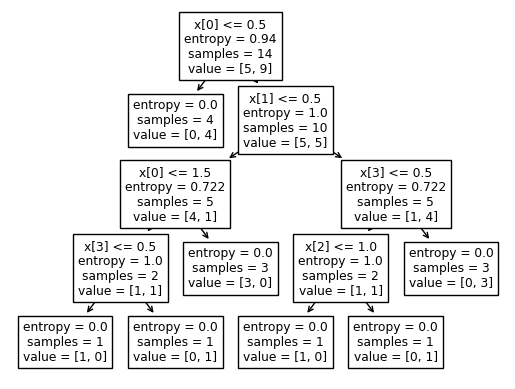

In [263]:
from sklearn import tree
tree.plot_tree(dectree)

In [264]:
import pickle

In [265]:
filename = "dectree.pkl"
pickle.dump(dectree,open(filename,"wb"))